## Linear regression with interaction effects

Estimating a linear regression model with annual income in USD (**earn**) as the response variable. Investigating whether the relationship between income **earn** and level of education **education** differs depending on gender **male** or not.

### Data Understanding

Y (response variable) = **earn** (income in USD)

X1 = **education** (level of education, number of years)

X2 = **male** (gender, male or female)

X3 = Interaction term between **education** and **male** (education × male)

Dataset Source: [https://github.com/avehtari/ROS-Examples/blob/master/Earnings/data/earnings.csv]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset_orig = pd.read_csv("Datasets/earnings.csv")

In [3]:
dataset_orig.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


**earn** - the person's annual income in USD. Retrieved from registry.

**height** - height of the person in inches. Self-reported.

**weight** - weight of the person in pounds. Self-reported.

**male** - dummy variable with values ​​1 (male) and 0 (female). Retrieved from registry.

**ethnicity** - the person's ethnicity, with Black, Hispanic, Other, and White categories. Retrieved from registry.

**education** - number of years of education. Retrieved from registry.

**age** - age. Retrieved from registry

In [4]:
dataset = dataset_orig[['earn', 'height', 'weight', 'male', 'ethnicity', 'education', 'age']]

In [5]:
dataset.head()

,earn,height,weight,male,ethnicity,education,age
0,50000.0,74,210.0,1,White,16.0,45
1,60000.0,66,125.0,0,White,16.0,58
2,30000.0,64,126.0,0,White,16.0,29
3,25000.0,65,200.0,0,White,17.0,57
4,50000.0,63,110.0,0,Other,16.0,91


In [6]:
dataset.describe()

,earn,height,weight,male,education,age
count,1816.000000,1816.000000,1789.000000,1816.000000,1814.000000,1816.000000
mean,21147.296256,66.568833,156.305198,0.371696,13.235391,42.934471
std,22531.765123,3.831822,34.617059,0.483391,2.556638,17.161672
min,0.000000,57.000000,80.000000,0.000000,2.000000,18.000000
25%,6000.000000,64.000000,130.000000,0.000000,12.000000,29.000000
50%,16000.000000,66.000000,150.000000,0.000000,12.000000,39.000000
75%,27000.000000,69.250000,180.000000,1.000000,15.000000,56.000000
max,400000.000000,82.000000,342.000000,1.000000,18.000000,91.000000


In [7]:
dataset.shape

(1816, 7)

In [ ]:
# Convert height from inches to cm
dataset['height_cm'] = dataset['height'] * 2.54

# Convert weight from pounds to kg
dataset['weight_kg'] = dataset['weight'] * 0.453592

### Descriptive Analysis
#### Checking Missing Values

In [9]:
dataset.isna().sum()

earn          0
height        0
weight       27
male          0
ethnicity     0
education     2
age           0
height_cm     0
weight_kg    27
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
dataset.isna().sum()

earn         0
height       0
weight       0
male         0
ethnicity    0
education    0
age          0
height_cm    0
weight_kg    0
dtype: int64

In [12]:
dataset = dataset[dataset['earn'] > 0.0]

In [13]:
dataset.shape

(1605, 9)

#### EARN

In [14]:
dataset['earn'].describe()

count      1605.000000
mean      23657.003115
std       22671.288087
min         200.000000
25%       10000.000000
50%       19000.000000
75%       30000.000000
max      400000.000000
Name: earn, dtype: float64

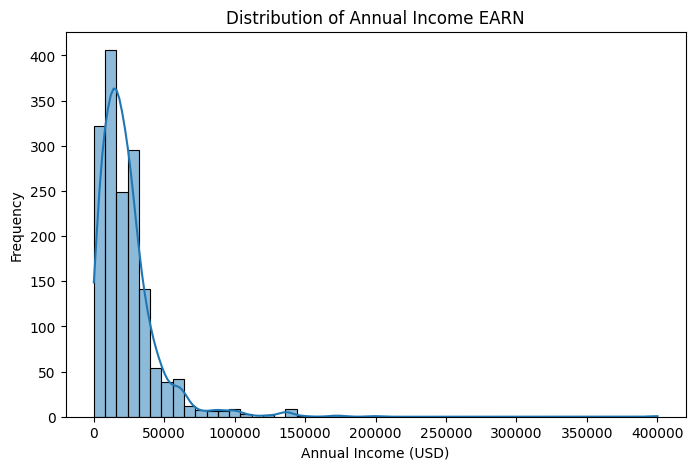

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=50, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

> It is very right skewed! There seems to be many outliers or incomes that are unusual.

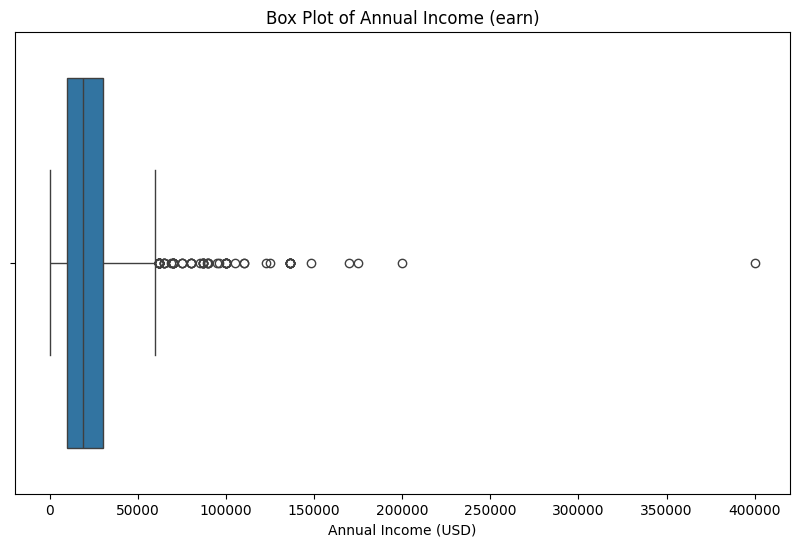

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

Outliers start around 60 or 70000 USD, It would be better to remove the outliers here!  
> Let's remove the outliers of EARN!

In [17]:
Q1 = dataset['earn'].quantile(0.25)
Q3 = dataset['earn'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['earn'] >= lower_bound) & (dataset['earn'] <= upper_bound)]

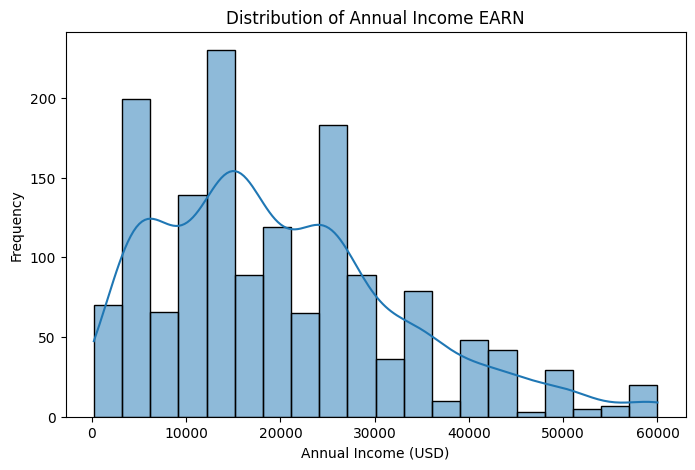

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=20, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

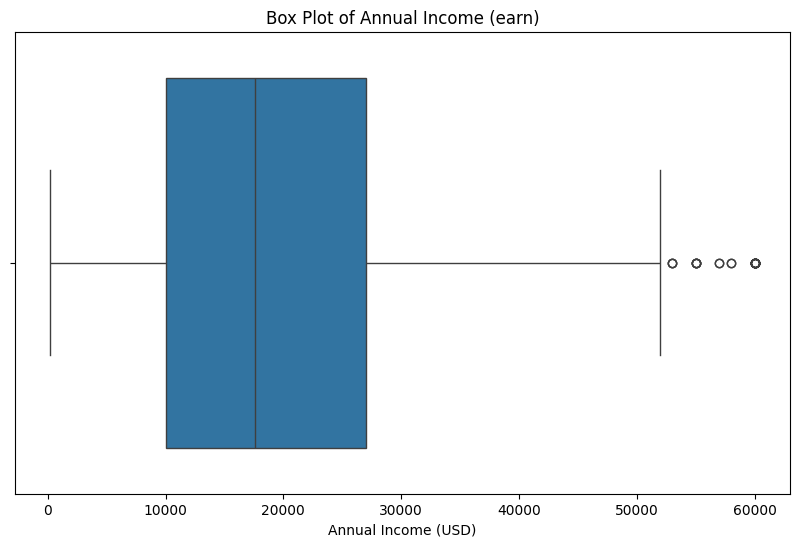

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

#### HEIGHT

In [20]:
dataset['height_cm'].describe()

count    1528.000000
mean      169.428639
std         9.802375
min       144.780000
25%       162.560000
50%       167.640000
75%       177.800000
max       208.280000
Name: height_cm, dtype: float64

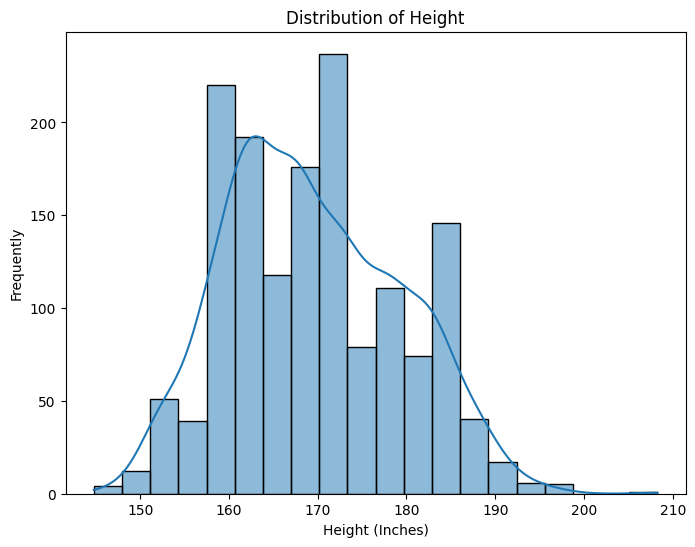

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['height_cm'], bins=20, kde=True)
plt.title("Distribution of Height")
plt.xlabel('Height (Inches)')
plt.ylabel('Frequently')
plt.show()

> The graph shows a (similar to) normal distributed shape!

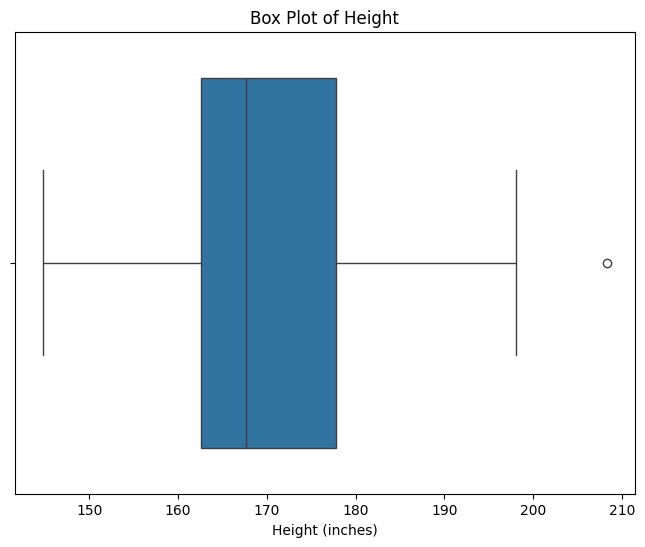

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['height_cm'])
plt.title('Box Plot of Height')
plt.xlabel('Height (inches)')
plt.show()

#### WEIGHT

In [23]:
dataset['weight_kg'].describe()

count    1528.000000
mean       71.043550
std        15.586111
min        36.287360
25%        58.966960
50%        68.038800
75%        81.646560
max       155.128464
Name: weight_kg, dtype: float64

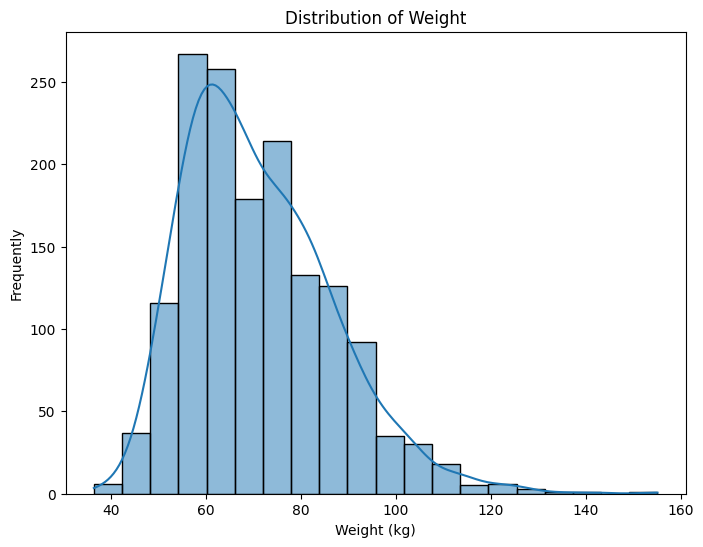

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['weight_kg'], bins=20, kde=True)
plt.title("Distribution of Weight")
plt.xlabel('Weight (kg)')
plt.ylabel('Frequently')
plt.show()

A little bit right skewed, but we let it be for now!

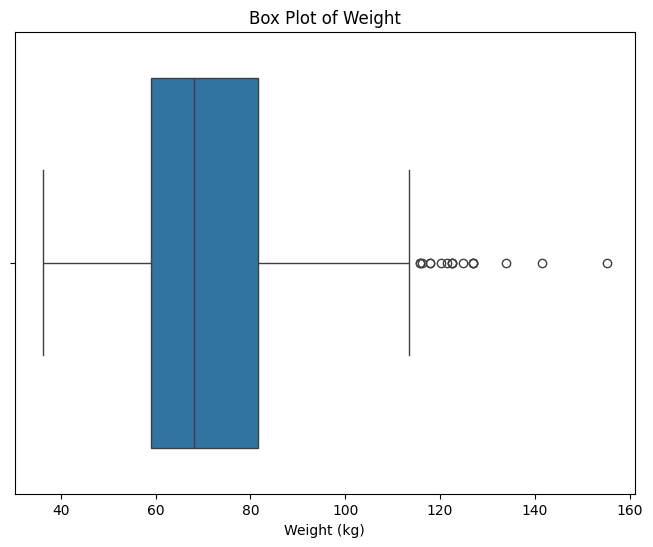

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['weight_kg'])
plt.title('Box Plot of Weight')
plt.xlabel('Weight (kg)')
plt.show()

> There are some outliers, but we let them be for now as they are not too many.

#### AGE

In [28]:
dataset['age'].describe()

count    1528.000000
mean       42.915576
std        17.467719
min        18.000000
25%        29.000000
50%        39.000000
75%        56.000000
max        91.000000
Name: age, dtype: float64

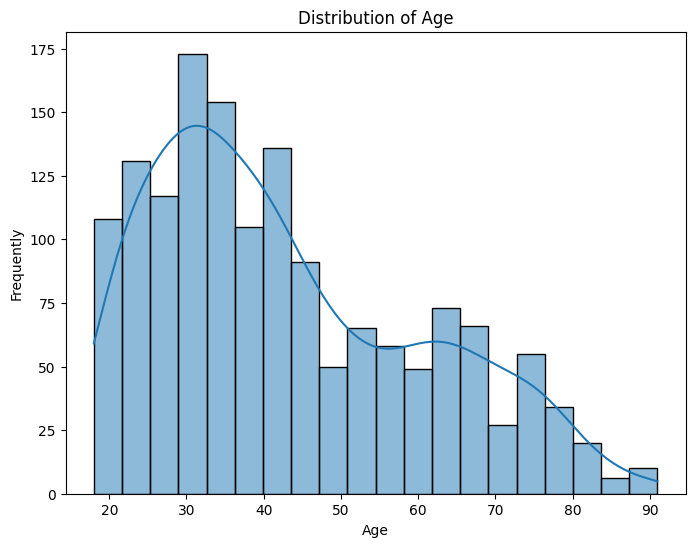

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Frequently')
plt.show()

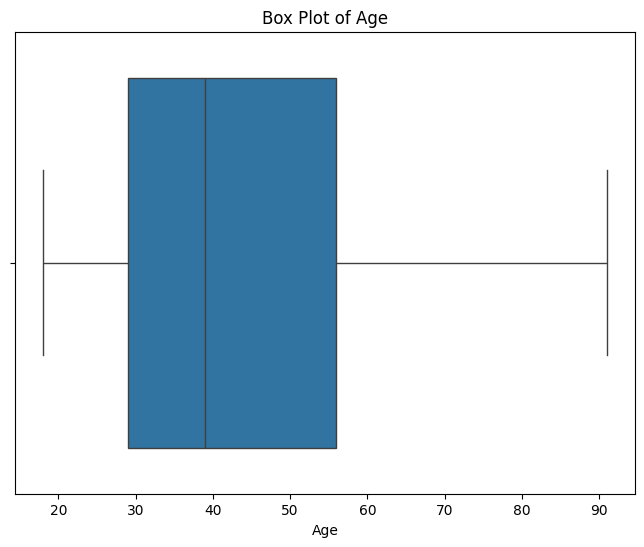

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

#### MALE

In [31]:
dataset['male'].value_counts()
# 1 male
# 0 female

male
0    927
1    601
Name: count, dtype: int64

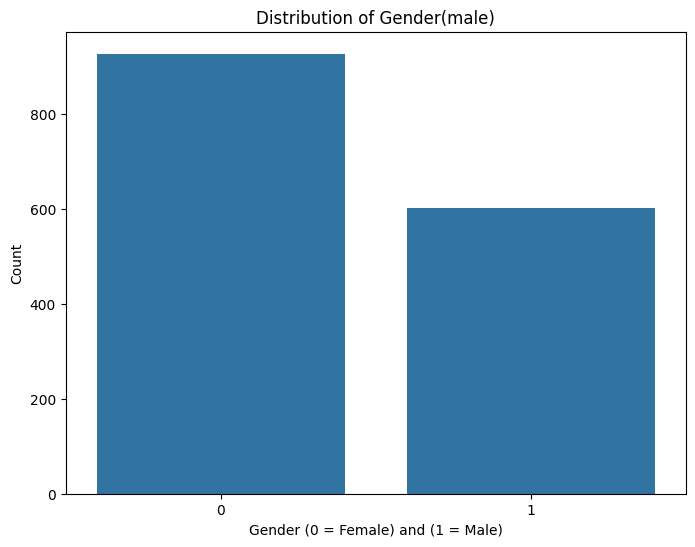

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['male'])
plt.title('Distribution of Gender(male)')
plt.xlabel("Gender (0 = Female) and (1 = Male)")
plt.ylabel('Count')
plt.show()

#### ETHNICITY

In [33]:
dataset['ethnicity'].value_counts()

ethnicity
White       1242
Black        163
Hispanic      92
Other         31
Name: count, dtype: int64

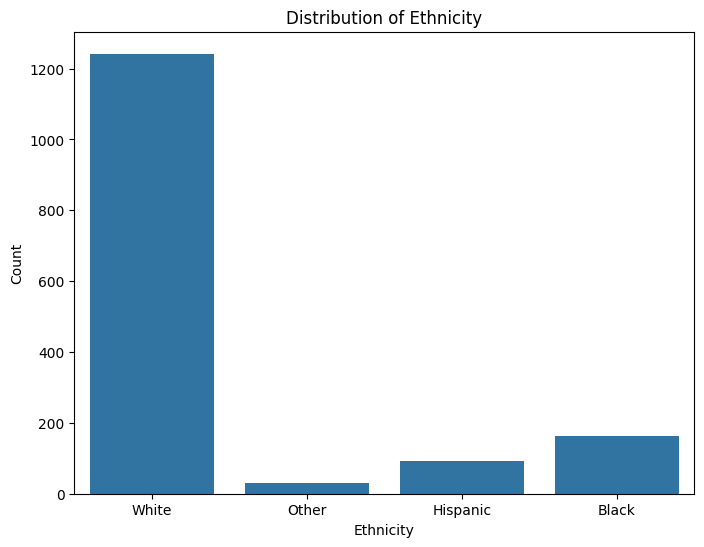

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['ethnicity'])
plt.title('Distribution of Ethnicity')
plt.xlabel("Ethnicity")
plt.ylabel('Count')
plt.show()

#### Height vs. Annual Income

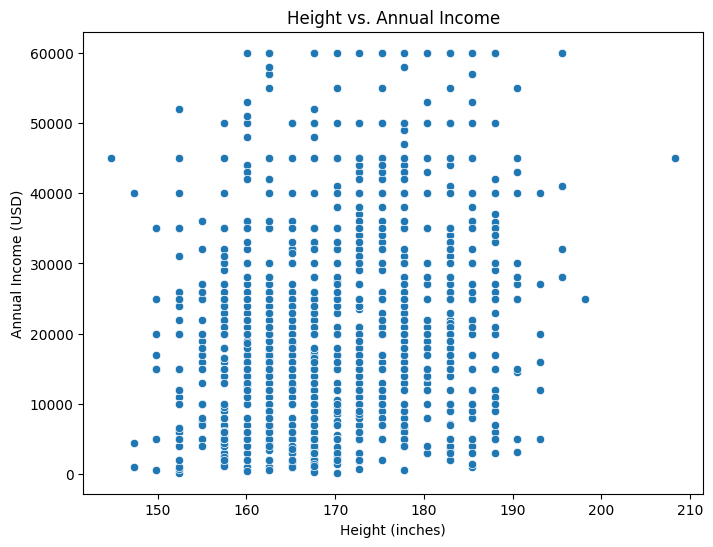

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['height_cm'], y=dataset['earn'])
plt.title('Height vs. Annual Income')
plt.xlabel('Height (inches)')
plt.ylabel('Annual Income (USD)')
plt.show()

In [ ]:
correlation = dataset['height_cm'].corr(dataset['earn'])
print(f'Correlation between height (cm) and earn: {correlation}')
# The correlation is slightly stronger than weight but still weak and positive.

Correlation between height (cm) and earn: 0.24236717505127423


#### Weight vs Annual Income

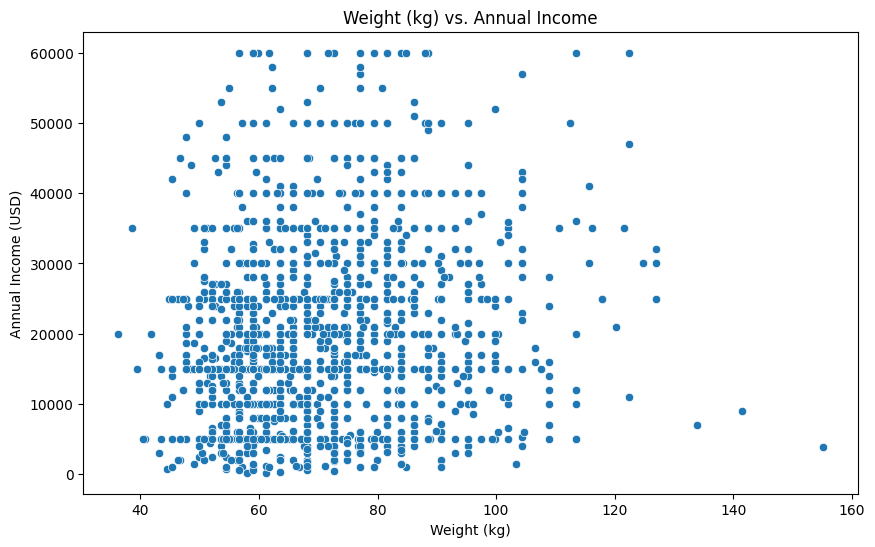

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['weight_kg'], y=dataset['earn'])
plt.title('Weight (kg) vs. Annual Income')
plt.xlabel('Weight (kg)')
plt.ylabel('Annual Income (USD)')
plt.show()

In [ ]:
correlation = dataset['weight_kg'].corr(dataset['earn'])
print(f'Correlation between weight (kg) and earn: {correlation}')
# The correlation is very weak and positive, indicating a very slight positive relationship.

Correlation between weight (kg) and earn: 0.14128820251438298


> Weak Relationships: Both weight and height show weak correlations with annual income, implying that they may not be significant predictors of income in your regression model.